In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=2.5)


In [60]:
def calculate_winner(s_winners, n_signals):
    for i in range(n_signals):
        if np.all(s_winners[i] >= s_winners):
            winner = i 
            break
    return winner

def create_target(current_active, n_signals, nt, current, w_self, w_back, alpha):
    target = np.ones((n_signals, nt))
    target[current_active, :] = current
    for i in range(current_active):
        target[current_active - i - 1,  :] *= w_back + alpha * i
    for i in range(n_signals - current_active):
        target[current_active + i, :] *= w_self - alpha * i
        
    return target

def run_stage(index, nt, s, target, current_active, dt, tau_s, noise):
    T_win = np.nan 
    winner = np.nan   
    while(index < nt - 1):
        s_winners = s[:, index] + (target[:, index] - s[:, index]) * (dt / tau_s) + noise[:, index]
        winner = calculate_winner(s_winners, s.shape[0])
        s[:, index + 1] = s_winners
        index += 1
        if winner != current_active:
            T_win = index * dt
            break
        
    return T_win, winner, index

def run_signal_simulation(sigma, g_a, tau_a, tau_s, w_self, w_back, alpha, dt, T_total, n_signals, debug=False):
    
    T_cue = 0.100
    g_cue = 10.0
    time = np.arange(0, T_total + T_cue, dt)
    n
    nt = time.size
    s = np.zeros((n_signals, nt))
    noise = sigma * np.sqrt(dt) * np.random.randn(n_signals, nt)
    should_win = np.arange(0, n_signals, 1)
    winners = np.ones(n_signals - 1) * np.nan
    T_winners = np.ones(n_signals - 1) * np.nan

    # Initial values
    index = 0
    winners[0] = 0
    T_winners[0] = 0.0
    for i in range(n_signals):
        s[i, 0] = w_self - alpha * (i + 1)


    # Current
    for sequence_index in range(n_signals - 2):
        T_win = T_winners[sequence_index]
        factor = np.exp(T_win / tau_a)
        current = w_self - g_a * (1 - np.exp(-time / tau_a) * factor)
        # Create target
        current_active = sequence_index
        target = create_target(current_active, n_signals, nt, current, w_self, w_back, alpha)

        # Run next stage
        T_win, winner, index = run_stage(index, nt, s, target, current_active, dt, tau_s, noise)
        winners[sequence_index + 1] = winner
        T_winners[sequence_index + 1] = T_win
        if debug:
            print('-----')
            print('sequence index', sequence_index)
            print('winner', winner)
            print('should win', should_win[sequence_index + 1])
            print('index', index)
            print('T_win', T_win)
        
        if should_win[sequence_index + 1] > winner:
            break
            
    return s, T_winners, winners

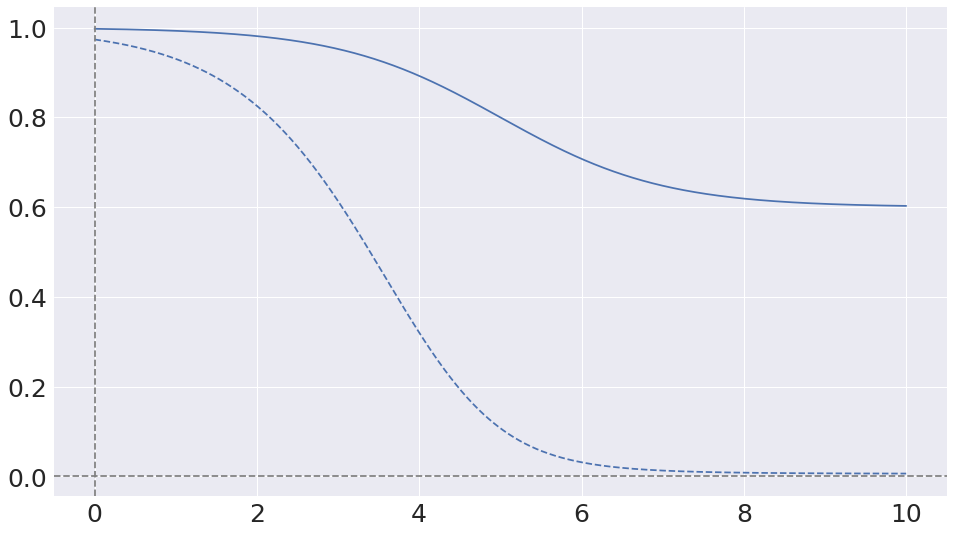

In [61]:
palette = sns.color_palette()

num = 1000
n_patterns = 10
center = 5
G = 1
index = 0
x = np.linspace(0.0, 10.0, num=num)
p = 0.4 / (1 + np.exp(G * (x - center) )) + 0.6
plt.plot(x, p, color=palette[index])
y = np.power(p, n_patterns)
plt.plot(x, y, '--', color=palette[index])
plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray');

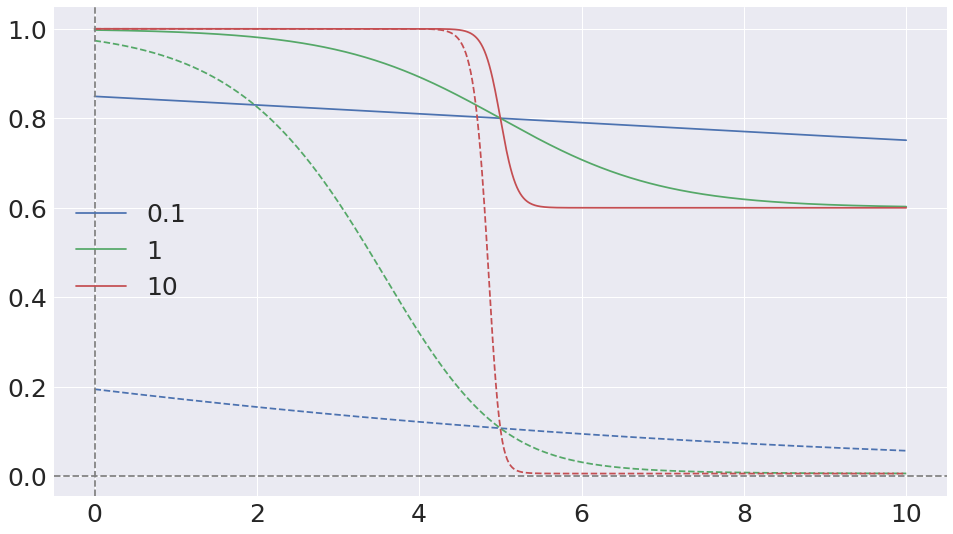

In [62]:
palette = sns.color_palette()
x = np.linspace(0.0, 10.0, num=num)
num = 1000
n_patterns = 10
center = 5
Gs = [0.1, 1, 10]

for index, G in enumerate(Gs):
    p = 0.4 / (1 + np.exp(G * (x - center) )) + 0.6
    plt.plot(x, p, color=palette[index], label=str(G))
    y = np.power(p, n_patterns)
    plt.plot(x, y, '--', color=palette[index])
plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')

plt.legend();

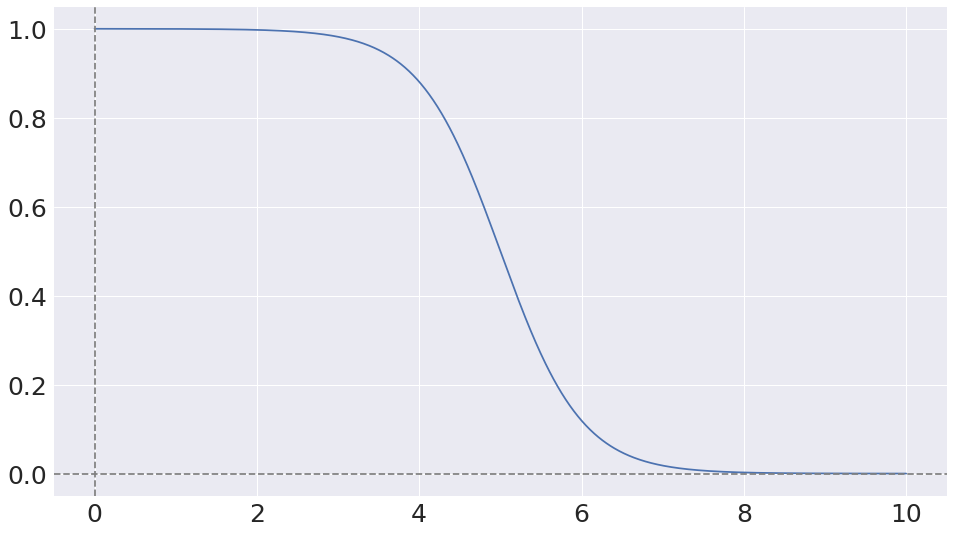

In [63]:
center = 5

p = 0.5 * np.tanh(center - x) + 0.5
plt.plot(x, p)

plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')

## A complete sequence recall artificial system

In [72]:
import pprint
T_total = 1.0
dt = 0.0001
time = np.arange(0, T_total, dt)
tau_a = 0.250
tau_s = 0.010
g_a = 1.0
w_self = 1.0
alpha = 0.5
w_back = -10.0
w_robust = 2 * alpha

sigma_effective = 0.0
sigma = sigma_effective * 4 * np.sqrt(2) *  w_robust / np.sqrt(tau_s)
print('sigma', sigma)
sigma = 1.0
n_signals = 5

aux = run_signal_simulation(sigma, g_a, tau_a, tau_s, w_self, w_back, alpha, dt, T_total, n_signals, debug=True)
s, T_winners, winners = aux
pprint.pprint(T_winners)
pprint.pprint(winners)

sigma 0.0
-----
sequence index 0
winner 1
should win 1
index 1051
T_win 0.1051
-----
sequence index 1
winner 2
should win 2
index 2664
T_win 0.2664
-----
sequence index 2
winner 3
should win 3
index 3208
T_win 0.32080000000000003
array([ 0.    ,  0.1051,  0.2664,  0.3208])
array([ 0.,  1.,  2.,  3.])


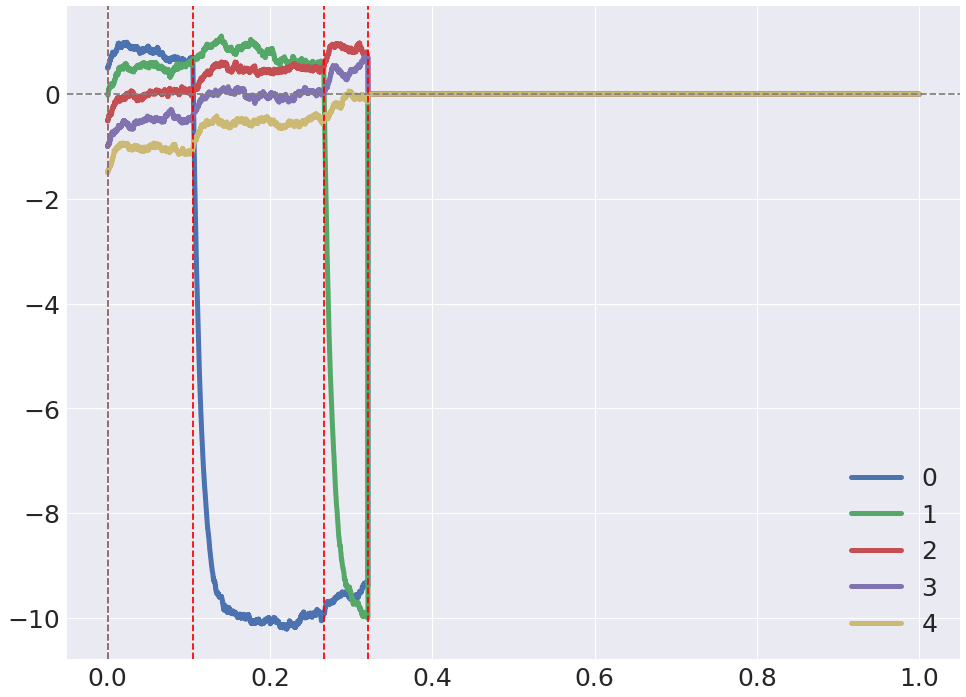

In [73]:
lw = 5

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


for index, s_instance in enumerate(s):
    ax.plot(time, s_instance, lw=lw, label=str(index))

accumulator = 0
for T_win in T_winners:
    ax.axvline(T_win, ls='--', color='red')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

## Get bounds

In [8]:
%%time
T_total = 0.500
dt = 0.0001
tau_a = 0.250
tau_s = 0.010
g_a = 1.0
w_self = 1.0
alpha = 0.5
w_back = -2.0

sigma = 0.5
n_signals = 4

n_simulations = 250
time = np.arange(0, T_total, dt)
nt = time.size
s_collection = np.zeros((n_signals, nt, n_simulations))

for sim_index in range(n_simulations):
    aux = run_signal_simulation(sigma, g_a, tau_a, tau_s, w_self, w_back, alpha,
                                dt, T_total, n_signals, debug=False)
    s, T_winners, winners = aux
    s_collection[:, :, sim_index] = s

CPU times: user 15 s, sys: 32 ms, total: 15 s
Wall time: 15 s


/home/heberto/miniconda2/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


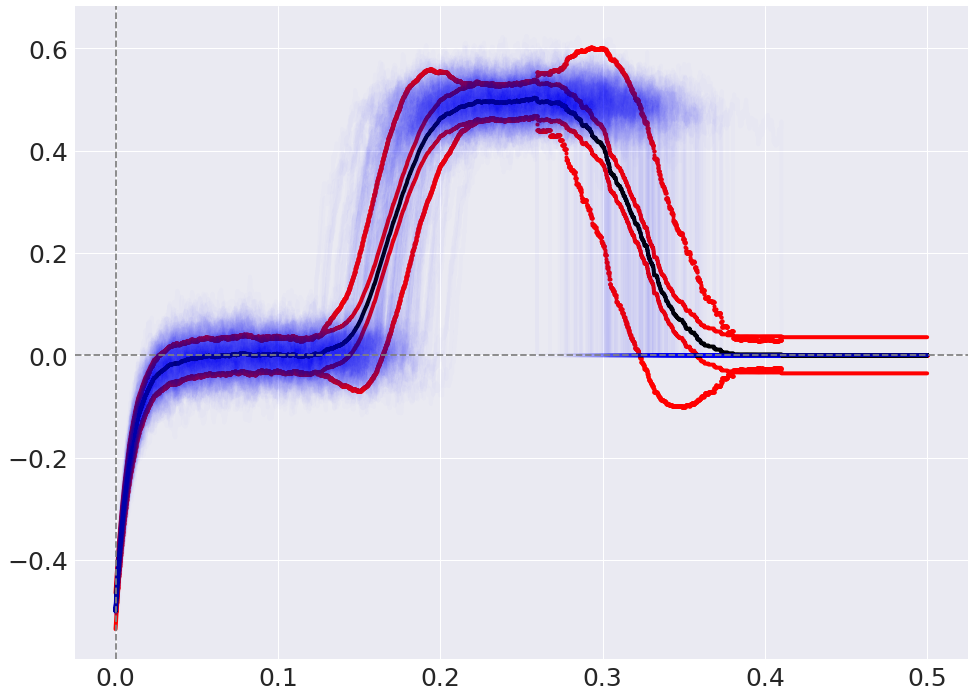

In [9]:
lw = 4
ms = 4
palette = sns.color_palette()
pattern_to_plot = 2
mean = np.mean(s_collection[pattern_to_plot, ...], axis=1)
std = np.std(s_collection[pattern_to_plot, ...], axis=1)
std_theo = np.sqrt(tau_s) * sigma * np.sqrt(0.5)



fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(time, mean, lw=lw, color='black')
ax.plot(time, mean + std, 'o', ms=ms, lw=lw, color='red')
ax.plot(time, mean - std, 'o', ms=ms, lw=lw, color='red')

ax.plot(time, mean - std_theo, '-', ms=ms, lw=lw, color='red')
ax.plot(time, mean + std_theo, '-', ms=ms, lw=lw, color='red')


for index, s_number in enumerate(s_collection[pattern_to_plot, ...].T):
    ax.plot(time, s_number, lw=lw, color='blue', alpha=0.01)


#ax.set_xlim([-0.010, 0.110])
#ax.set_ylim([0.1, 1.0])
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

/home/heberto/miniconda2/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


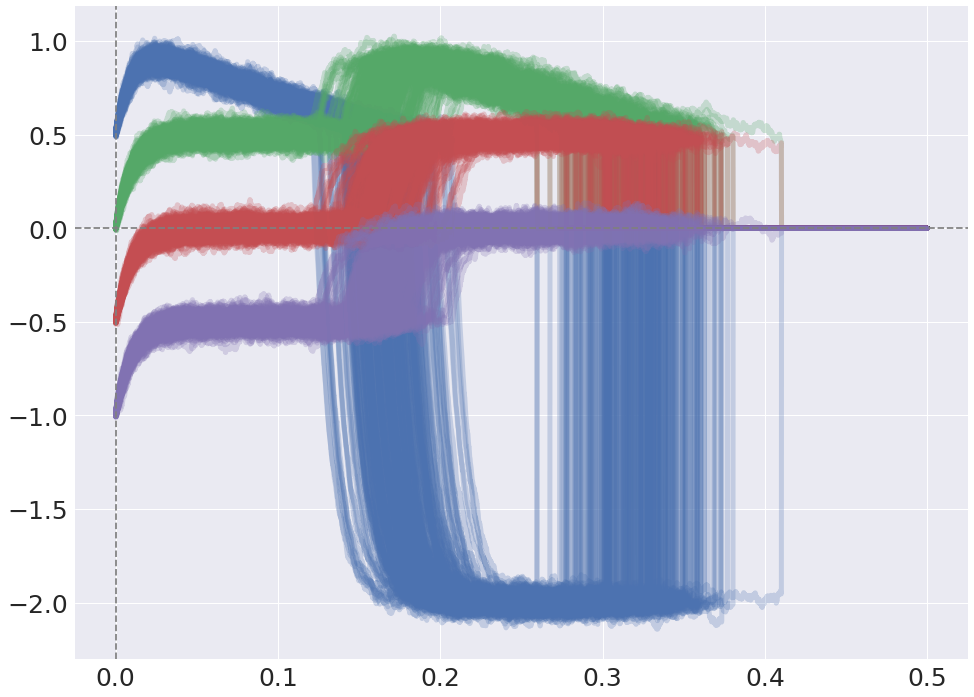

In [10]:
lw = 5
palette = sns.color_palette()


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, s_number in enumerate(s_collection):
    for s in s_number.T:
        ax.plot(time, s, lw=lw, color=palette[index], alpha=0.25)

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

## Systematic

In [11]:
%%time
T_total = 1.0
dt = 0.0001
tau_a = 0.250
tau_s = 0.010
g_a = 1.0
w_self = 1.0
alpha = 0.5
w_back = -2.0

sigma = 2.0
n_signals = 6

num = 50
n_simulations = 1000
sigma_vector = np.linspace(0, 60.0, num=num)
winners_collections = np.zeros((num, n_simulations, n_signals - 1))
T_winners_collection = np.zeros((num, n_simulations, n_signals - 1))

for sigma_index, sigma in enumerate(sigma_vector):
    for sim_index in range(n_simulations):
        aux = run_signal_simulation(sigma, g_a, tau_a, tau_s, w_self, w_back, alpha, 
                                    dt, T_total, n_signals, debug=False)
        s, T_winners, winners = aux
        winners_collections[sigma_index, sim_index, :] = winners
        T_winners_collection[sigma_index, sim_index, :] = T_winners


CPU times: user 13min 43s, sys: 1.08 s, total: 13min 44s
Wall time: 13min 44s


In [12]:
winners_collections[0, 0:10, :]

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.]])

In [13]:
winners_collections[40:50, 0, :]

array([], shape=(0, 5), dtype=float64)

In [14]:
survivors = np.zeros((num, n_signals - 1))
for index in range(num):
    for i in range(0, n_signals - 1):
        survivors[index, i] = np.nansum(winners_collections[index, :, i] == i )

In [15]:
survivors[40:50, :]

array([], shape=(0, 5), dtype=float64)

In [16]:
successes = np.zeros((num, n_signals - 2))
for i in range(n_signals - 2):
    for index in range(num):
        successes[index, i] = survivors[index, i + 1] / survivors[index, i]

In [17]:
successes[40:50, :]

array([], shape=(0, 4), dtype=float64)

In [20]:
forward_failure = np.zeros((num, n_signals - 1))
for index in range(num):
    for i in range(0, n_signals - 1):
        forward_failure[index, i] = np.nansum(winners_collections[index, :, i] > i)
        
forward_failure /= survivors

In [19]:
winners_collections[40, :10, 4] 

IndexError: index 40 is out of bounds for axis 0 with size 30

In [ ]:
winners_collections[40:50, 0, :] 

In [ ]:
winners_collections[40, :10, 4]  > 4

In [ ]:
forward_failure[40:50, :]

In [30]:
backward_failure = np.zeros((num, n_signals - 1))
for index in range(num):
    for i in range(0, n_signals - 1):
        backward_failure[index, i] = np.nansum(winners_collections[index, :, i] < i)

In [ ]:
backward_failure[40:50, :]

In [22]:
show_power = False

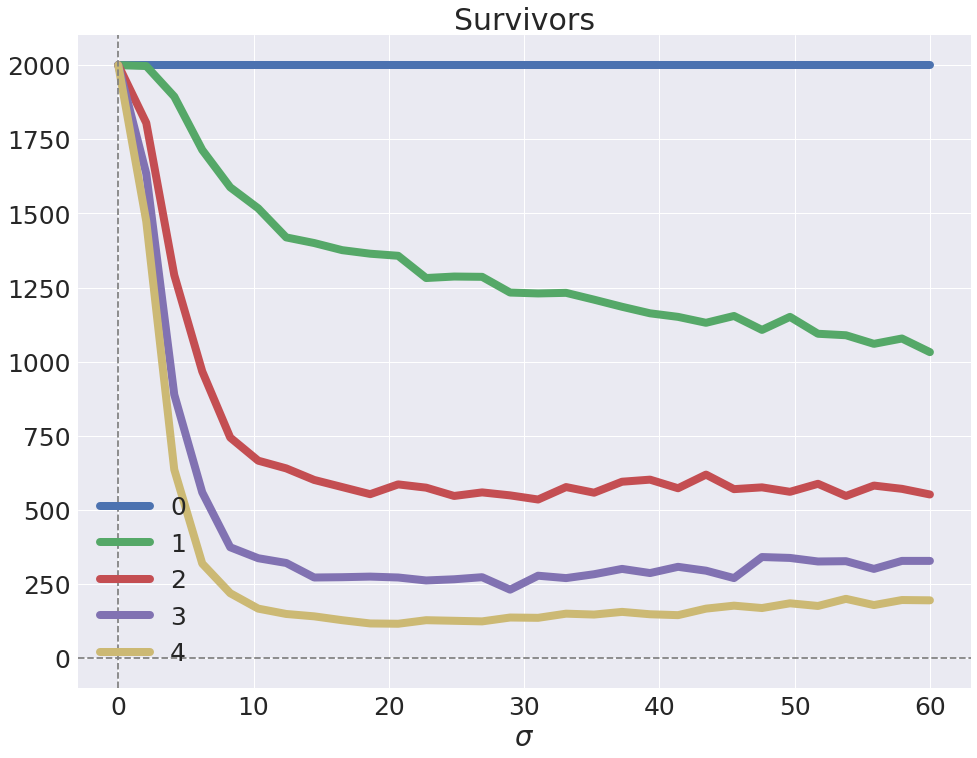

In [23]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, success in enumerate(survivors.T):
    ax.plot(sigma_vector, success, color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

ax.set_title('Survivors')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

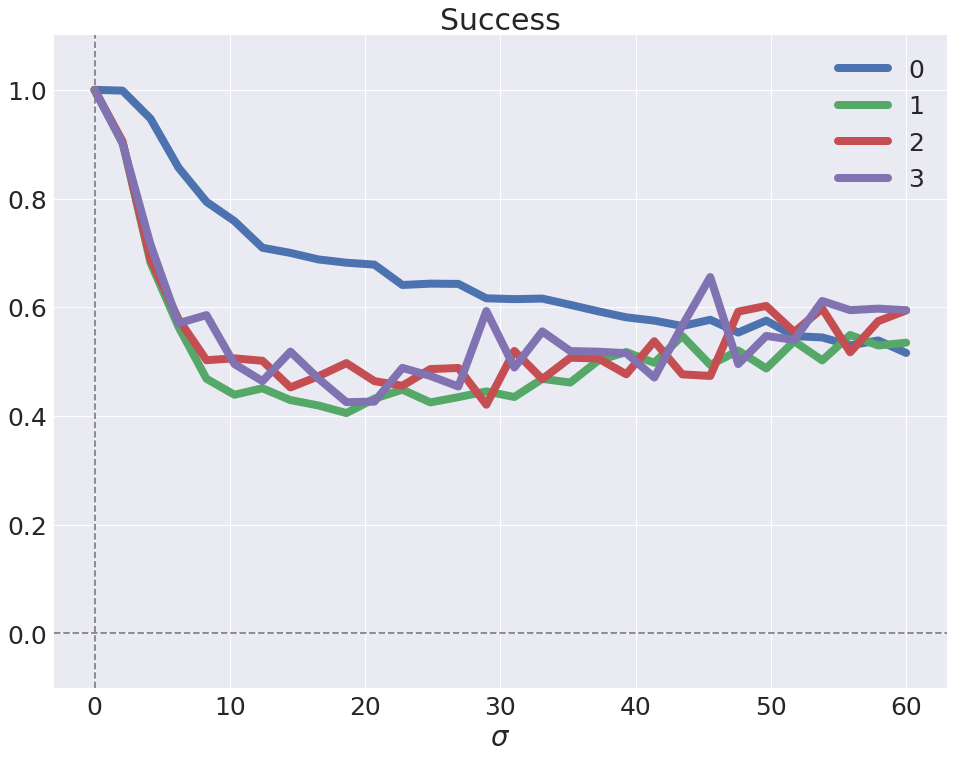

In [25]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, success in enumerate(successes.T):
    ax.plot(sigma_vector, success, color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

ax.set_title('Success')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

In [26]:
successes.shape

(30, 4)

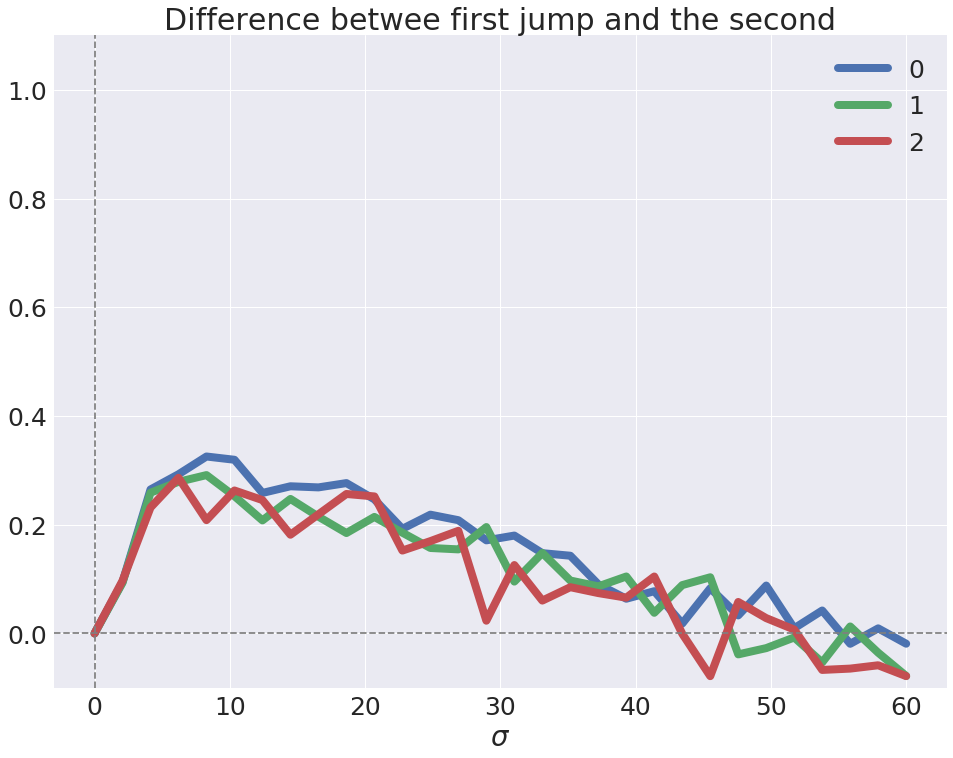

In [27]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, success in enumerate(successes[:, 1:].T):
    ax.plot(sigma_vector, successes[:, 0] - success, color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

ax.set_title('Difference betwee first jump and the second')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

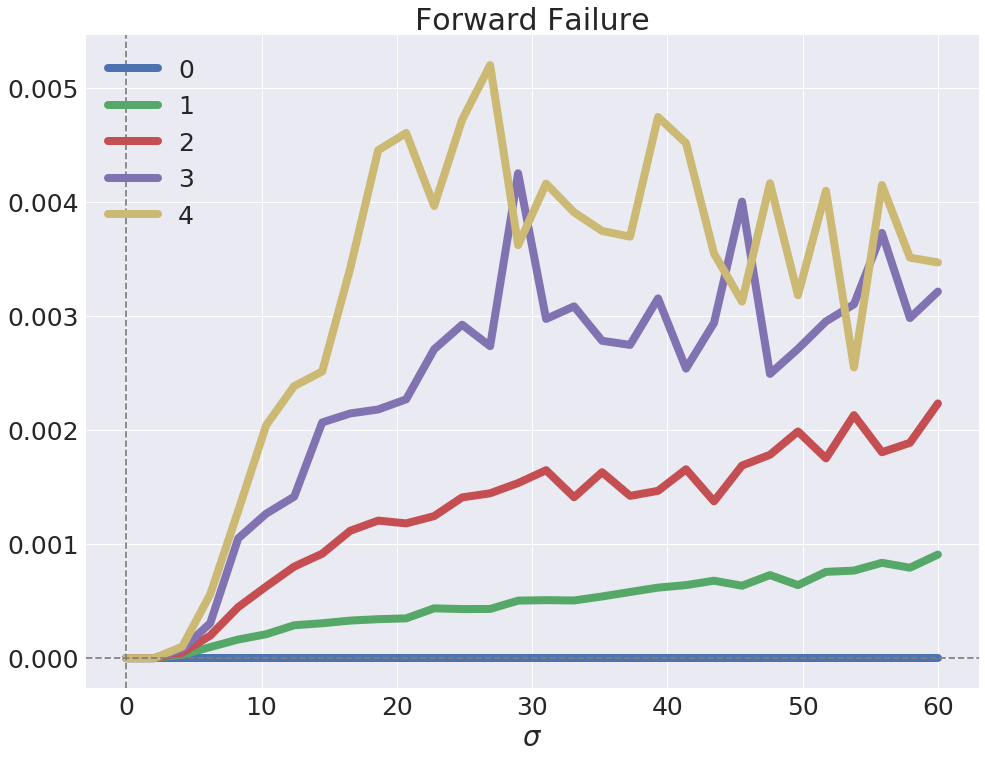

In [28]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index in range(n_signals - 1):
    ax.plot(sigma_vector, forward_failure[:, index] / survivors[:, index], color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

ax.set_title('Forward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
#ax.set_ylim([-0.1, 1.1])
ax.legend();

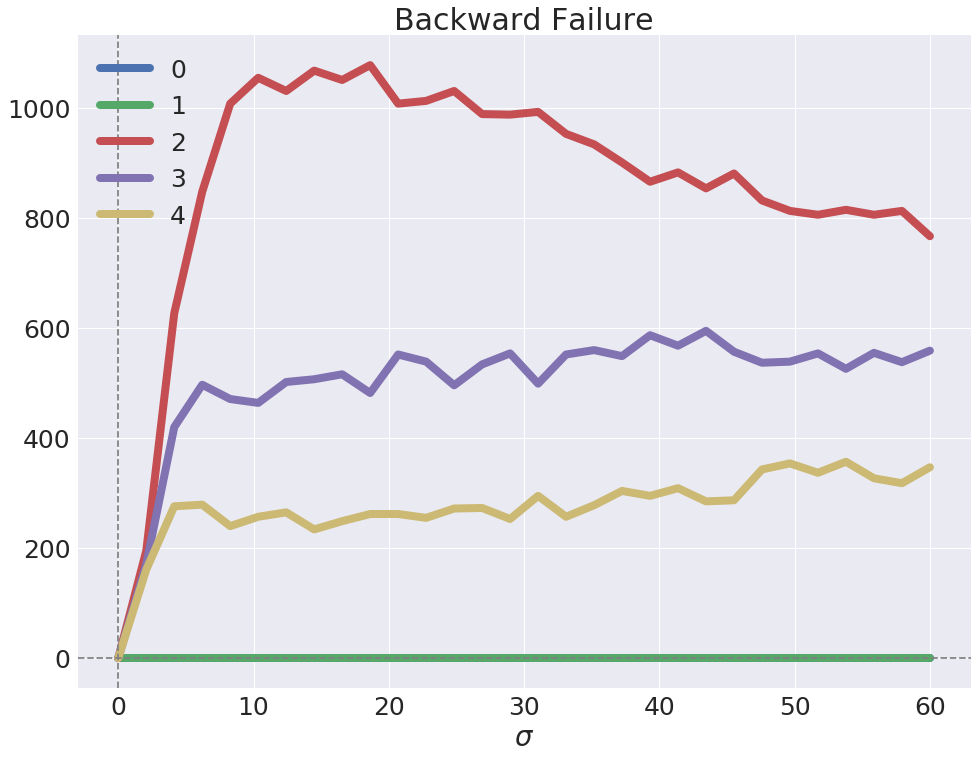

In [31]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, success in enumerate(backward_failure.T):
    ax.plot(sigma_vector, success, color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

ax.set_title('Backward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
#ax.set_ylim([-0.1, 1.1])
ax.legend();

I want to test that backward failure is what makes up for the difference between the success rate jumping from the first state to the second and the rest of them

In [121]:
successes.shape

(100, 4)

In [122]:
backward_failure.shape

(100, 5)

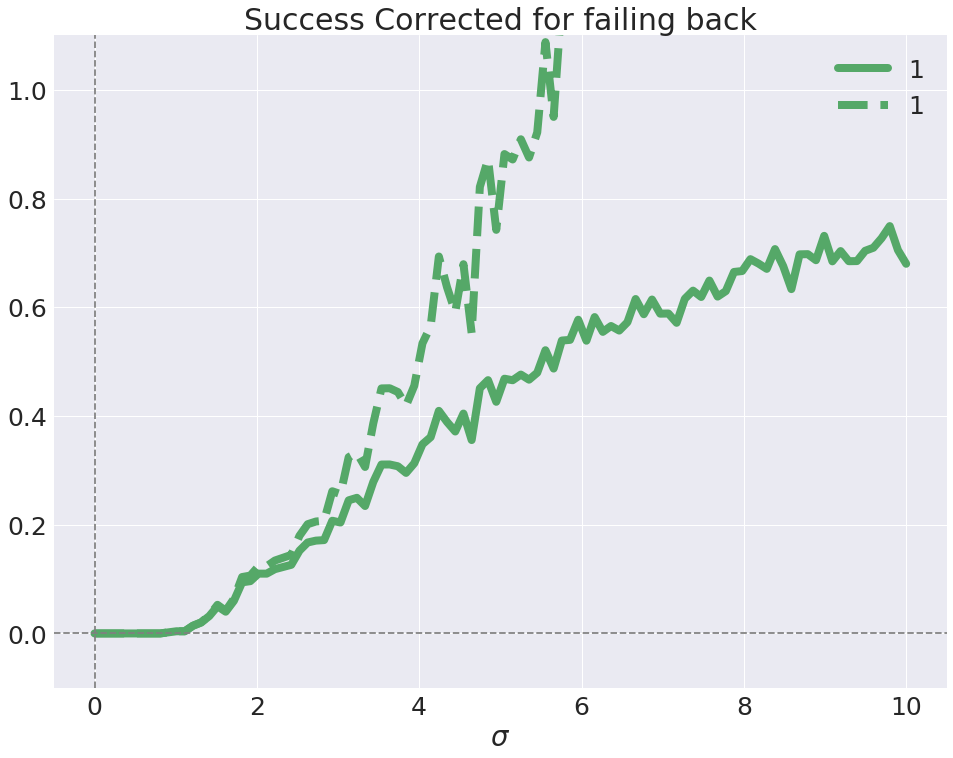

In [123]:
lw = 8
palette = sns.color_palette()
n_patterns = 10
index = 1

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


#for index in range(n_signals - 2):
ax.plot(sigma_vector, 1 - successes[:, index], color=palette[index], lw=lw, label=str(index))
ax.plot(sigma_vector, backward_failure[:, index + 1] + forward_failure[:, index + 1],
        ls='--',  color=palette[index], lw=lw, label=str(index))


    
ax.set_title('Success Corrected for failing back')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

#### Another attempt, point-wise

In [125]:
winners_collections[30, 0:10, :]

array([[  0.,   1.,   0.,  nan,  nan],
       [  0.,   1.,   0.,  nan,  nan],
       [  0.,   1.,   0.,  nan,  nan],
       [  0.,   1.,   2.,   3.,   4.],
       [  0.,   1.,   2.,   1.,  nan],
       [  0.,   1.,   0.,  nan,  nan],
       [  0.,   1.,   0.,  nan,  nan],
       [  0.,   1.,   2.,   3.,   4.],
       [  0.,   1.,   2.,   3.,   4.],
       [  0.,   1.,   2.,   1.,  nan]])

In [126]:
winners_collections[0, 0:10, :]

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.]])

In [127]:
n_signals

6

In [128]:
survivals = np.zeros((num, n_signals - 1))

In [ ]:
for signal in range(n_signals - 2):
    for index_sigma in range(num):
        for trial_index in range(n_simulations):
            winner = winners_collections[index_sigma, trial_index, signal]
            survivals = 

In [165]:
forward_failure = np.zeros((num, n_signals - 1))
for index in range(num):
    for i in range(0, n_signals - 1):
        for trial in range(n_simulations):
            aux = winners_collections[index, trial, i]
            if not np.isnan(aux):
                forward_failure[index, i] += aux > i


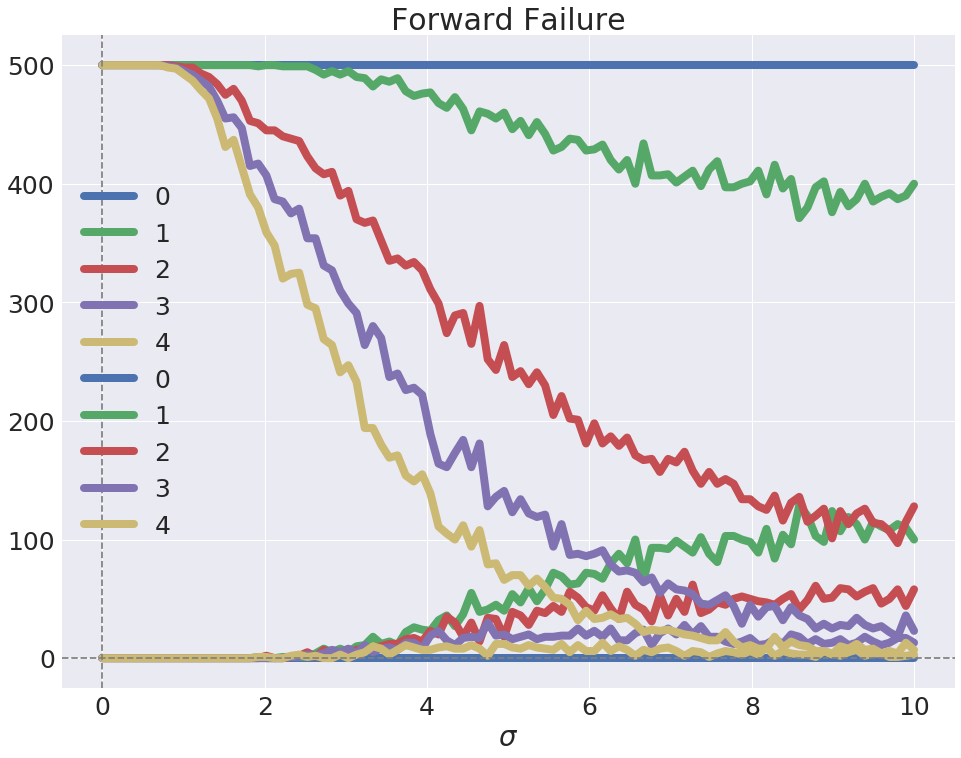

In [166]:
lw = 8
palette = sns.color_palette()
n_patterns = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, success in enumerate(forward_failure.T):
    ax.plot(sigma_vector, success, color=palette[index], lw=lw, label=str(index))
    if show_power:
        ax.plot(sigma_vector, np.power(success, n_patterns), ls='--', color=palette[index], lw=lw, label=str(index))

for index, success in enumerate(survivors.T):
    ax.plot(sigma_vector, success, color=palette[index], lw=lw, label=str(index))        

ax.set_title('Forward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
#ax.set_ylim([-0.1, 1.1])
ax.legend();

In [167]:
survivors.shape

(100, 5)

In [168]:
forward_failure.shape

(100, 5)

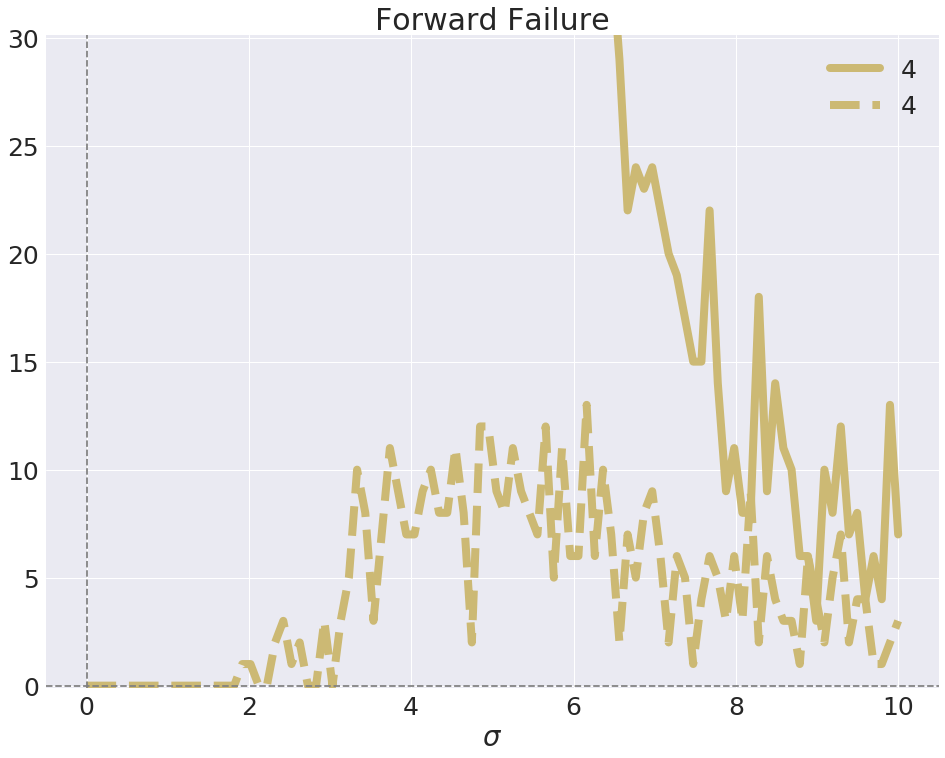

In [174]:
lw = 8
palette = sns.color_palette()
n_patterns = 10
index = 4

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


ax.plot(sigma_vector, survivors[:, index], color=palette[index], lw=lw, label=str(index))
ax.plot(sigma_vector, forward_failure[:, index], ls='--', color=palette[index], lw=lw, label=str(index))        

ax.set_title('Forward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 30.1])
ax.legend();

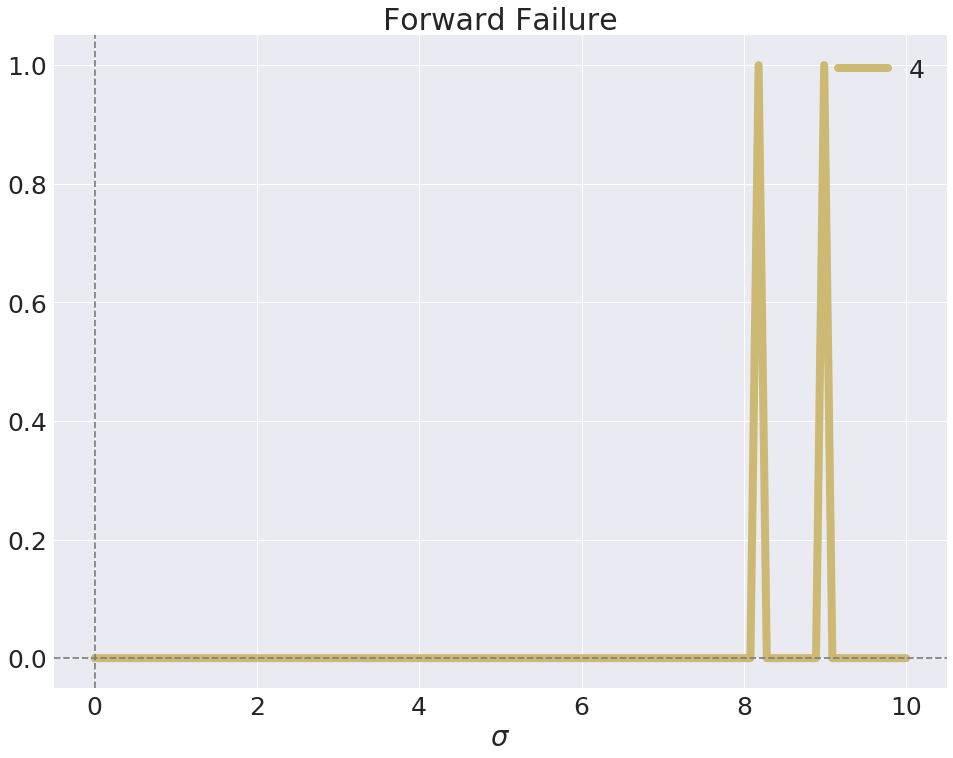

In [176]:
lw = 8
palette = sns.color_palette()
n_patterns = 10
index = 4

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


ax.plot(sigma_vector, survivors[:, index] < forward_failure[:, index], color=palette[index], lw=lw, label=str(index))
        
ax.set_title('Forward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

In [177]:
index = 4
np.where(survivors[:, index] < forward_failure[:, index])

(array([81, 89]),)

In [186]:
winners_collections[20, :, 4]

array([  4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,  nan,
         4.,   2.,   2.,   4.,  nan,   4.,   4.,   4.,   4.,   4.,   2.,
         4.,   4.,   4.,   2.,  nan,   4.,  nan,  nan,   4.,  nan,   2.,
         4.,   2.,   2.,   4.,  nan,  nan,   4.,   4.,   4.,   4.,   4.,
         4.,  nan,   4.,   4.,   4.,  nan,   4.,  nan,   4.,   2.,   4.,
         2.,   4.,   4.,   4.,   4.,  nan,   2.,   4.,   4.,   4.,  nan,
         4.,   4.,   2.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,  nan,   4.,   4.,   4.,   4.,  nan,
         4.,  nan,   4.,   4.,   4.,   4.,   4.,   2.,   4.,   4.,  nan,
         4.,   4.,  nan,   4.,   4.,   4.,   4.,   4.,   4.,  nan,  nan,
        nan,   4.,   4.,   4.,   2.,   4.,   4.,  nan,   4.,   4.,   4.,
         4.,   4.,   2.,  nan,   4.,   4.,  nan,  nan,   4.,   4.,   4.,
        nan,   2.,  nan,  nan,   2.,   4.,   4.,   4.,   4.,   4.,   2.,
         4.,   2.,   4.,   4.,  nan,   4.,  nan,   

In [182]:
winners_collections[81, :, 4] > 4

9

In [181]:
survivors[81, 4]

8.0

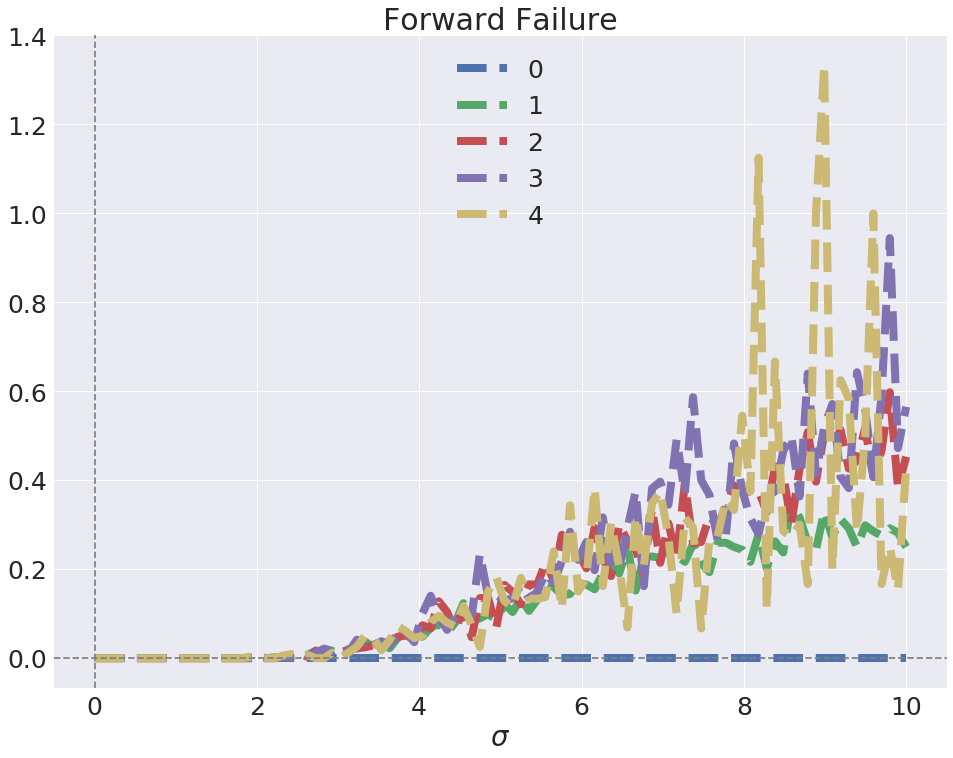

In [170]:
lw = 8
palette = sns.color_palette()
n_patterns = 10
index = 3

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index in range(n_signals - 1):
    ax.plot(sigma_vector, forward_failure[:, index] / survivors[:, index], ls='--', color=palette[index], lw=lw, label=str(index))        

ax.set_title('Forward Failure')
ax.set_xlabel(r'$\sigma$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
#ax.set_ylim([-0.1, 1.1])
ax.legend();